In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import seaborn as sns
import pandas as pd
import math

from Utils.UtilsGeoViz import *
from Utils.UtilsViz import *
from Utils.DataUtils import *

In [3]:
US_coord = [37.0902, -102]
NY_COORD = [40.7128, -74.0060]

data_path = os.path.join(os.getcwd(), "Data")
ny_datapath = os.path.join(data_path, "NY")

In [4]:
os.listdir(ny_datapath)

['cleaned_listings.csv', 'listings.csv']

In [5]:
listings = pd.read_csv(os.path.join(ny_datapath, "cleaned_listings.csv"))

In [6]:
listings.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_verifications_count,desc_len,host_about_len,lreview_year,lreview_month,lreview_day,freview_year,freview_month,freview_day,ndays_between_f_l_reviews,ndays_host,num_amenities
0,2454,within a day,60,f,1.0,1.0,t,f,Manhattan,t,Condominium,Entire home/apt,2,1.0,0.0,2.0,Real Bed,137.0,150.0,50.0,1,0.0,7,730,7,7,730,730,7.0,730.0,16,36,65,65,1,1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1,0,0,1.00,2,412,0,2019.0,1.0,30.0,2019.0,1.0,30.0,0.0,3803,15
1,2539,within an hour,100,f,8.0,8.0,t,t,Brooklyn,f,Apartment,Private room,4,1.0,1.0,1.0,Real Bed,149.0,100.0,25.0,1,25.0,1,730,1,1,730,730,1.0,730.0,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,8,0,5,3,0.23,4,392,431,2018.0,10.0,19.0,2015.0,12.0,4.0,15.0,3800,44
2,2595,within a day,60,f,5.0,5.0,t,t,Manhattan,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,225.0,350.0,100.0,2,0.0,1,1125,1,1,1125,1125,1.0,1125.0,30,60,90,365,43,14,95.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict,t,t,2,1,0,1,0.38,5,1000,427,2019.0,1.0,2.0,2009.0,11.0,21.0,19.0,3798,36
3,3330,na,100,f,4.0,4.0,t,t,Brooklyn,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,70.0,150.0,125.0,2,50.0,5,730,5,5,730,730,5.0,730.0,2,27,37,290,39,12,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,3,0,3,0,0.35,4,1000,25,2018.0,12.0,7.0,2010.0,1.0,4.0,3.0,3737,25
4,3647,na,100,f,1.0,1.0,t,t,Manhattan,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,150.0,200.0,75.0,2,20.0,3,7,3,3,7,7,3.0,7.0,30,60,90,365,0,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,1,0,1,0,0.76,6,1000,354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3721,11


# Price preprocessing 

No handles with labels found to put in legend.


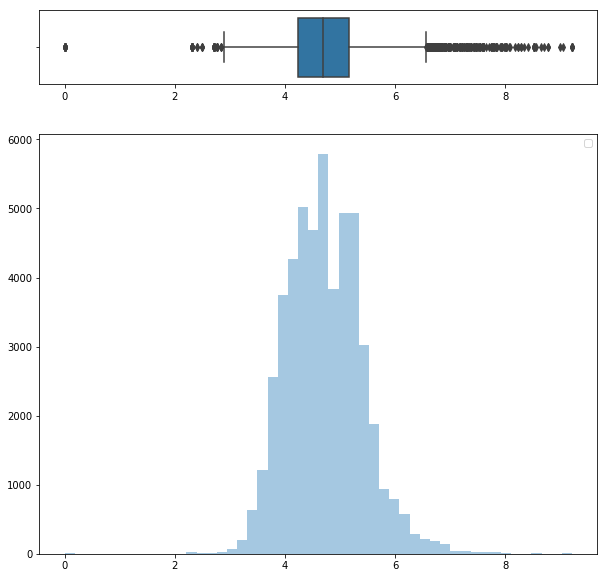

In [11]:
def get_logprice(price):
    if price <= 0.0:
        return 0.0
    else:
        return np.log(price)
listings['price_log'] = listings['price'].apply(get_logprice)
plot_dist(data=listings, colname="price_log", kde=False)

# Amenities

Let's have a look at the distribution of amenities

No handles with labels found to put in legend.


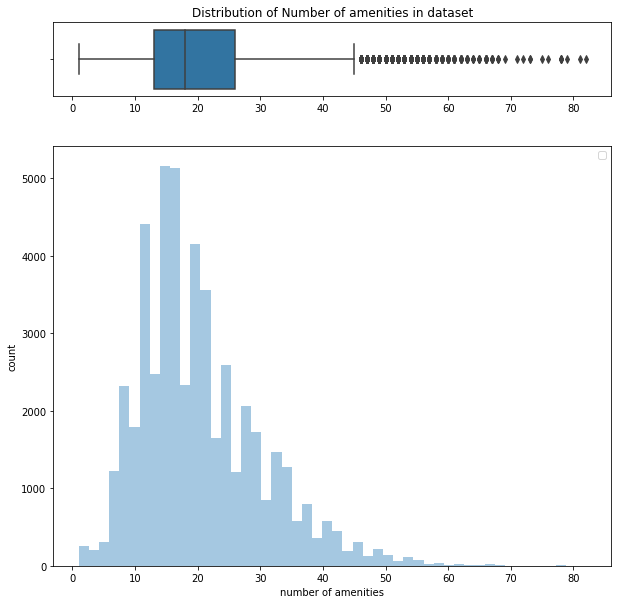

In [8]:
g = plot_dist(data=listings, colname="num_amenities", xlabel="number of amenities", ylabel="count", kde=False, title="Distribution of Number of amenities in dataset")

How does price behave based on number of amenities?

Let's filter out all the prices above 500$

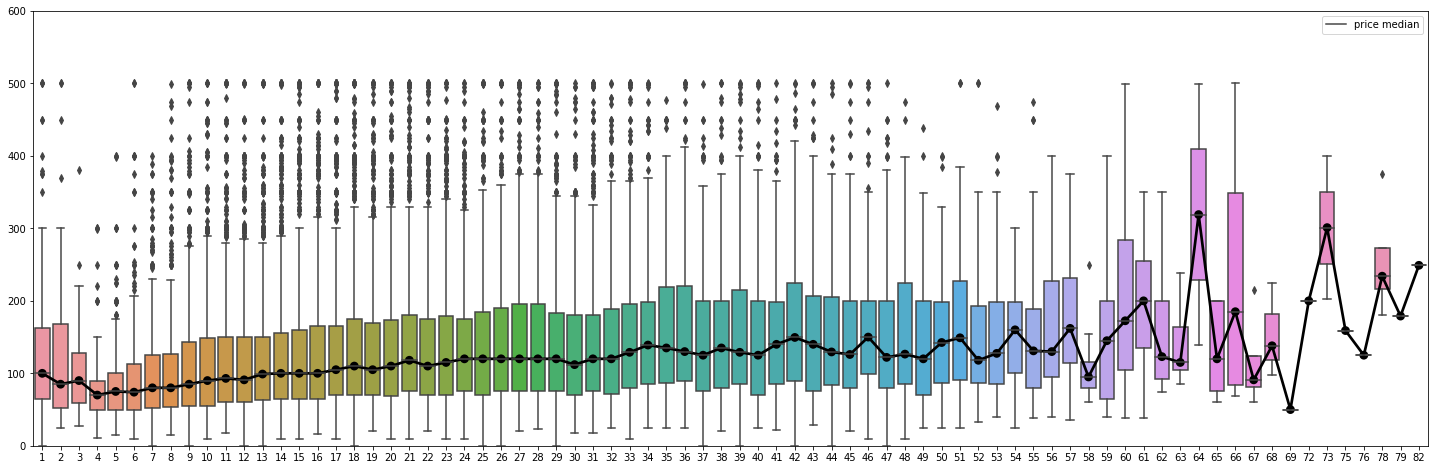

In [25]:
list_subset = listings[listings["price"] <= 500]
f, ax = plt.subplots(1,1,figsize=(25, 8))
g = plot_box_timegraph(x="num_amenities", y="price", data=list_subset, ax=ax, agg_rule="median")

Let's group price into bins and see how behaviour is

In [19]:
bins = list(range(0,100, 5))
listings['amenities_binned'] = pd.cut(listings['num_amenities'], bins)

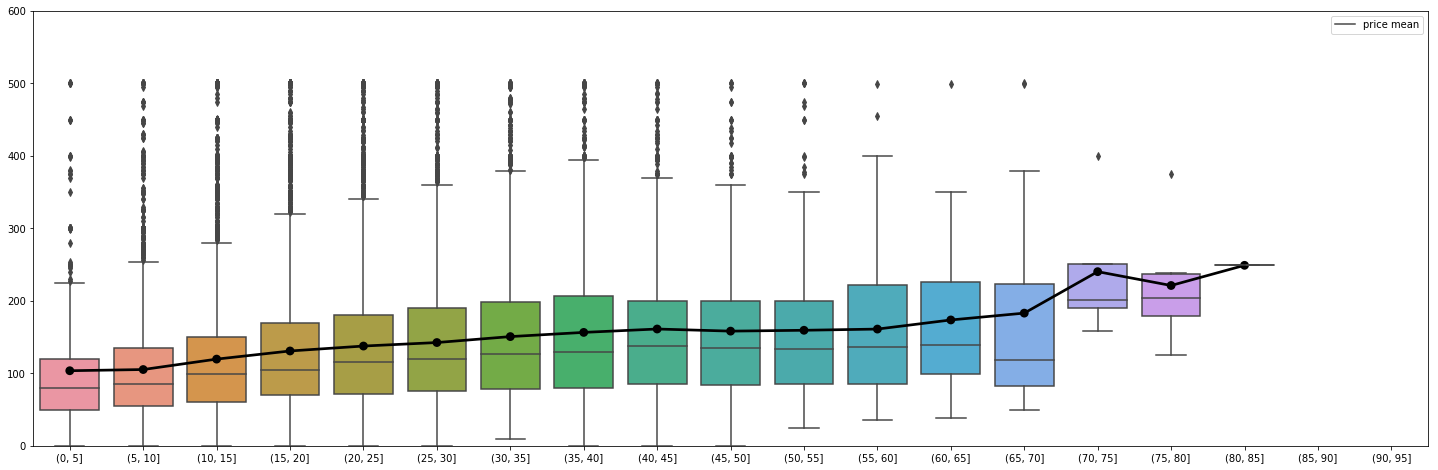

In [24]:
list_subset = listings[listings["price"] <= 500]
f, ax = plt.subplots(1,1,figsize=(25, 8))
g = plot_box_timegraph(x="amenities_binned", y="price", data=list_subset, ax=ax, agg_rule="mean")

# Neighbourhood Group vs. Price

In [27]:
listings["neighbourhood_group_cleansed"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)